In [5]:
import numpy as np
from keras.datasets import mnist
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers
import matplotlib.pyplot as plt

In [6]:
# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize data to range between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten data into a single vector of size 784
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Define input shape
input_shape = (784,)

# Define regularization parameter
reg_param = 10e-5

# Define autoencoder models with hidden dimensions of 32 and 64
encoding_dim_32 = 32
encoding_dim_64 = 64

11490434/11490434 [==============================] - 1s 0us/step


In [7]:
input_img = Input(shape=input_shape)
encoded_32 = Dense(encoding_dim_32, activation='relu', activity_regularizer=regularizers.l1(reg_param))(input_img)
encoded_64 = Dense(encoding_dim_64, activation='relu', activity_regularizer=regularizers.l1(reg_param))(input_img)

decoded_32 = Dense(784, activation='sigmoid')(encoded_32)
decoded_64 = Dense(784, activation='sigmoid')(encoded_64)

autoencoder_32 = Model(input_img, decoded_32)
autoencoder_64 = Model(input_img, decoded_64)

In [8]:
autoencoder_32.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder_64.compile(optimizer='adam', loss='binary_crossentropy')

In [9]:
autoencoder_32.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))
autoencoder_64.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 4s 15ms/step - loss: 0.2855 - val_loss: 0.2025
Epoch 2/50
235/235 [==============================] - 3s 14ms/step - loss: 0.1827 - val_loss: 0.1644
Epoch 3/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1536 - val_loss: 0.1423
Epoch 4/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1374 - val_loss: 0.1302
Epoch 5/50
235/235 [==============================] - 3s 14ms/step - loss: 0.1278 - val_loss: 0.1227
Epoch 6/50
235/235 [==============================] - 4s 15ms/step - loss: 0.1214 - val_loss: 0.1173
Epoch 7/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1166 - val_loss: 0.1134
Epoch 8/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1132 - val_loss: 0.1106
Epoch 9/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1109 - val_loss: 0.1086
Epoch 10/50
235/235 [==============================] - 4s 17ms/step - loss: 0.1092 - val_lo

In [10]:
# Generate 10 reconstructions for the train and test data for each model
decoded_imgs_32_train = autoencoder_32.predict(x_train)
decoded_imgs_64_train = autoencoder_64.predict(x_train)

decoded_imgs_32_test = autoencoder_32.predict(x_test)
decoded_imgs_64_test = autoencoder_64.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [13]:
mse_32_train = np.mean(np.power(x_train - decoded_imgs_32_train, 2), axis=1)
mse_64_train = np.mean(np.power(x_train - decoded_imgs_64_train, 2), axis=1)
mse_32_test = np.mean(np.power(x_test - decoded_imgs_32_test, 2), axis=1)
mse_64_test = np.mean(np.power(x_test - decoded_imgs_64_test, 2), axis=1)

In [14]:
print("Autoencoder model with 32-dimensional hidden layer:")
print("Train reconstruction error:", np.mean(mse_32_train))
print("Test reconstruction error:", np.mean(mse_32_test))

print("Autoencoder model with 64-dimensional hidden layer:")
print("Train reconstruction error:", np.mean(mse_64_train))
print("Test reconstruction error:", np.mean(mse_64_test))

Autoencoder model with 32-dimensional hidden layer:
Train reconstruction error: 0.010105673
Test reconstruction error: 0.009832502
Autoencoder model with 64-dimensional hidden layer:
Train reconstruction error: 0.0039748186
Test reconstruction error: 0.0039481525


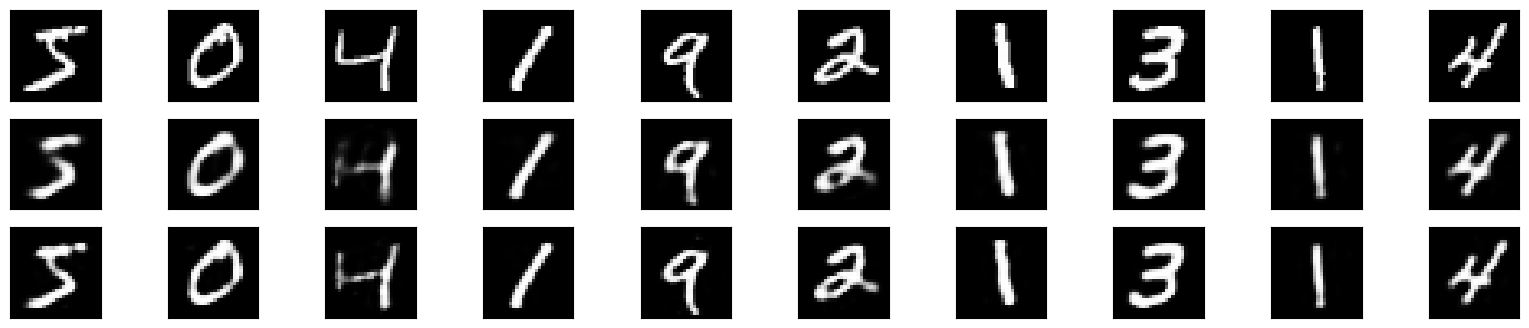

In [35]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display reconstructions using 32-dimensional hidden layer
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_imgs_32_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


    # Display reconstructions using 64-dimensional hidden layer
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs_64_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()
   